# Intro
We will be trying to classify the different thinigs we can find in the Fashion MNIST Database. A very popular one, this is a set of images containing different clothing items.

Let's begin


# Getting Started

Importing required modules

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
mnist = keras.datasets.fashion_mnist

# The load data function returns images. 
# We split them into training and testing examples

(train_x, train_y), (test_x, test_y) = mnist.load_data()

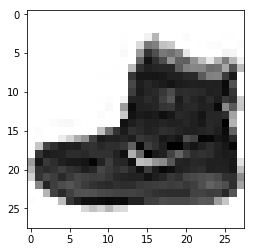

In [3]:
plt.imshow(train_x[0], cmap = 'binary')

We now normalize the data set for the better woking of the algorithm.


In [4]:
# train_x, test_x = train_x / 255.0 , test_x / 255.0  <--- This is correct too!

train_x = tf.keras.utils.normalize(train_x)
test_x  = tf.keras.utils.normalize(test_x)


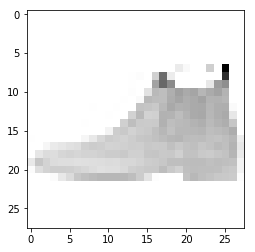

In [5]:
plt.imshow(test_x[0], cmap = 'binary')

# Defining the Model

We define our sequential Layer now

**Layer 1** A Flatten layer to make the 2D array of the images to a 1D as the input layer cannot accept such an array

**Layer 2** A dense layer with 128 neurons/units. We use the **relu** activation as negative values arent prefered for classification. More info will be found at the end of the exercise.

**Layer 3** A dense layer with 10 output nuerons. We use the **softmax** activation as wee need the one with the highest propability. It is also explained at the end of the exercise.

In [6]:
model = keras.Sequential([   keras.layers.Flatten(),
                             keras.layers.Dense(128, activation = 'relu'),
                             keras.layers.Dense(10, activation = 'softmax')  ])

# Compiling the Model

* The optimizer we use is the **ADAM** aka **Adaptive Moment Estimation** one. Its it better than the SGD algo as its better suited for sparce gradients. Its great on problems involving noise too. It is covered in detail at the end of the exercise.  


* Our **loss** function for this time will be, **sparse_categorical_crossentropy**. This is great for multiclass classification problems. This is bcoz we dont need a *hot ended target*. Otherwise, its better to go for a normal catergorical crossentropy.


* We will be trying to maximize accuracy rather than minimizing loss as its a classification problem. Hence we use **metrics** of **accuracy**

In [7]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


# Training and Testing 

In [8]:
model.fit(train_x, train_y, 
          epochs = 5)

Epoch 1/5
60000/60000 [==============================] - 3s 45us/sample - loss: 0.4924 - acc: 0.8238
Epoch 2/5
60000/60000 [==============================] - 3s 53us/sample - loss: 0.3634 - acc: 0.8670
Epoch 3/5
60000/60000 [==============================] - 2s 38us/sample - loss: 0.3271 - acc: 0.8782
Epoch 4/5
60000/60000 [==============================] - 3s 52us/sample - loss: 0.3017 - acc: 0.8885
Epoch 5/5
60000/60000 [==============================] - 2s 40us/sample - loss: 0.2860 - acc: 0.8933


In [9]:
model.evaluate(test_x, test_y)

10000/10000 [==============================] - 0s 21us/sample - loss: 0.3391 - acc: 0.8784


[0.3390851384162903, 0.8784]

#  RELU Activation

Does something like:

```python
if input > 0:
    return input
else:
    return 0
```

<img src = "Data/Pics/2.1.png" style="height:250px;">

# SoftMax Activation

Used for mulit class classification problems. We generate a propability for each class and the highest confident one is carried over.

# ADAM Optimizer

* It requires lesser memory
* Appropriate for sparse gradients
* Uses Adaptive Gradient descent. Maintains per-parameter learning rate.
* Does RMS loss for optimizer calculation